<h1>Titanic Dataset</h1>

In [32]:
train = pd.read_csv('titanic_train.csv')

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>1.) Missing Values</h3>

In [64]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
null_list = train.isnull().sum()
for a,b in enumerate(null_list.iteritems()):
    print(f"{b[0]} - {(b[1]/len(train))*100}%")

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 19.865319865319865%
SibSp - 0.0%
Parch - 0.0%
Ticket - 0.0%
Fare - 0.0%
Cabin - 77.10437710437711%
Embarked - 0.22446689113355783%


In [95]:
n_list = []
for a,b in enumerate(null_list.iteritems()):
    if b[1]!=0:
        n_list.append(b)

for a,b in n_list:
    #print(f"{a} - {(b/len(train))*100}%")
    #null_df = pd.DataFrame(data={'Feature': [b[0]], 'Percentage of null values': [(b[1]/len(train))*100]})
    print("{feature} - {percentage:1.2f}%".format(feature=a,percentage=(b/len(train))*100))

Age - 19.87%
Cabin - 77.10%
Embarked - 0.22%


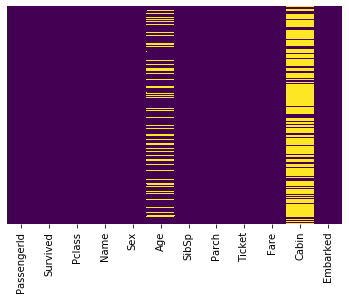

In [46]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

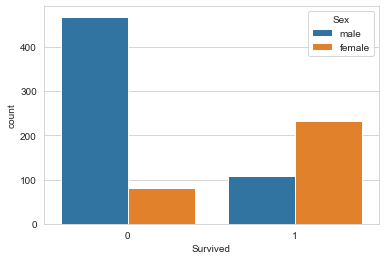

In [96]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

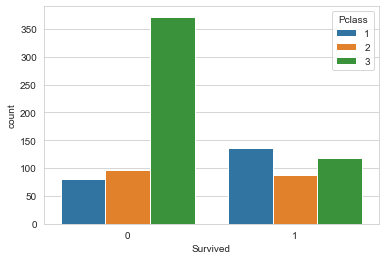

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

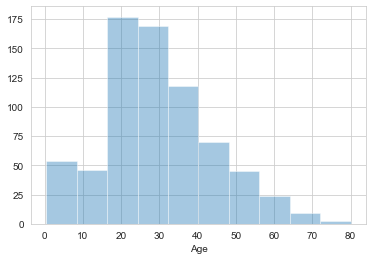

In [103]:
sns.distplot(train['Age'].dropna(), kde=False, bins=10)

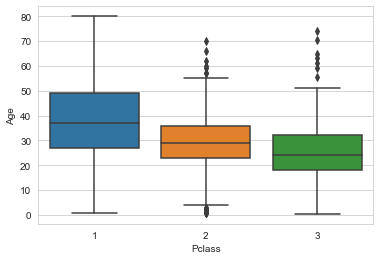

In [105]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [114]:
train.groupby(train['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [119]:
#Need to obtain mean algorithimcally
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
        return Age    

In [117]:
train['Age'] = train[['Age' , 'Pclass']].apply(impute_age, axis=1)

In [118]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

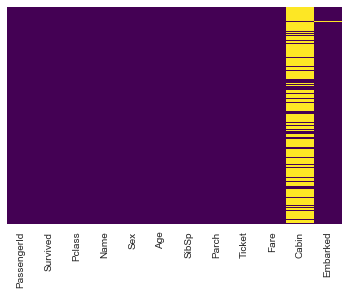

In [120]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [121]:
train.drop('Cabin', axis=1, inplace=True)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [123]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [124]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [125]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True) 

In [126]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [127]:
train = pd.concat([train,embark,sex],axis=1) 

In [128]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


In [129]:
X = train.drop('Survived',axis=1)

In [131]:
y = train['Survived']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rfc = RandomForestClassifier()

In [137]:
rfc.fit(X_train,y_train) 

RandomForestClassifier()

In [138]:
predictions = rfc.predict(X_test)

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [140]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[143  14]
 [ 38  73]]
0.8059701492537313
